In [1]:
# This notebook is for comparing selected receptors of neuromaps with Functional BF parcellation cortical data

# Includes:
#  Selected neuromaps - M1, nAchRs, FEOBVs
#  fetching the neuromaps
#  transofrming the maps to surface space
#  fetching the trsholded neuromaps
#  Comparing (stats.compare) neruomaps with BF parcellation cortical data (get only corr)
#  Spatial null models of neuromaps and comparing them with BF cortical data (get corr. and pval)

In [2]:
from neuromaps import stats
from neuromaps import datasets, images, nulls, resampling
from neuromaps.datasets import available_annotations
from neuromaps.datasets import available_tags
from neuromaps.datasets import fetch_annotation
import nibabel as nib
from nilearn.plotting import plot_glass_brain
import pandas as pd
from neuromaps import transforms, plotting
import numpy as np
from brainspace.datasets import load_conte69, load_fsa5
from brainspace.plotting import plot_hemispheres
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from matplotlib import pyplot as plt   
import zentables as zen

### Setting up the path and loading necessary neuromap files

In [3]:
main_path = "/srv/khan/users/sudesnac/"
#main_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/"

In [4]:
note_path = main_path + "HumanBF-Parcellation/notebook/"
data_path = main_path + "HumanBF-Parcellation/data/"
results_path = main_path + "HumanBF-Parcellation/results/Neuromaps/"
fig_path = main_path + "HumanBF-Parcellation/results/figures/Neuromaps/"

In [5]:
# Receptors to fetch
Aghourian_FEOBV = datasets.fetch_annotation(source='aghourian2017', desc='feobv')
Bedard_FEOBV = datasets.fetch_annotation(source='bedard2019', desc='feobv')
Tuominen_FEOBV = datasets.fetch_annotation(source='tuominen', desc='feobv')
M1 = datasets.fetch_annotation(desc='lsn3172176')
nAchRs = datasets.fetch_annotation(desc='flubatine')

 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


In [4]:
# transform to fsLR space
Aghourian_FEOBV_fslr = transforms.mni152_to_fslr(Aghourian_FEOBV, '32k')
Bedard_FEOBV_fslr = transforms.mni152_to_fslr(Bedard_FEOBV, '32k')
Tuominen_FEOBV_fslr = transforms.mni152_to_fslr(Tuominen_FEOBV, '32k')
M1_fslr = transforms.mni152_to_fslr(M1, '32k')
nAchRs_fslr = transforms.mni152_to_fslr(nAchRs, '32k')

In [8]:
# transform to fsaverage space
Aghourian_FEOBV_fsa = transforms.mni152_to_fsaverage(Aghourian_FEOBV, '10k')
Bedard_FEOBV_fsa = transforms.mni152_to_fsaverage(Bedard_FEOBV, '10k')
Tuominen_FEOBV_fsa = transforms.mni152_to_fsaverage(Tuominen_FEOBV, '10k')
M1_fsa = transforms.mni152_to_fsaverage(M1, '10k')
nAchRs_fsa = transforms.mni152_to_fsaverage(nAchRs, '10k')

In [9]:
# Load the tresholded data
Tr_Aghourian_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_L_data = Tr_Aghourian_FEOBV_fslr_L.agg_data()
Tr_Aghourian_FEOBV_fslr_R_data = Tr_Aghourian_FEOBV_fslr_R.agg_data()
Tr_Aghourian_FEOBV_fslr = (Tr_Aghourian_FEOBV_fslr_L, Tr_Aghourian_FEOBV_fslr_R)

Tr_Bedard_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_L_data = Tr_Bedard_FEOBV_fslr_L.agg_data()
Tr_Bedard_FEOBV_fslr_R_data = Tr_Bedard_FEOBV_fslr_R.agg_data()
Tr_Bedard_FEOBV_fslr = (Tr_Bedard_FEOBV_fslr_L, Tr_Bedard_FEOBV_fslr_R)

Tr_Tuominen_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_L_data = Tr_Tuominen_FEOBV_fslr_L.agg_data()
Tr_Tuominen_FEOBV_fslr_R_data = Tr_Tuominen_FEOBV_fslr_R.agg_data()
Tr_Tuominen_FEOBV_fslr = (Tr_Tuominen_FEOBV_fslr_L, Tr_Tuominen_FEOBV_fslr_R)

Tr_M1_fslr_L = images.load_gifti(results_path+'Receptor-M1_Treshold25%_L_fsLR-32k.gii')
Tr_M1_fslr_R = images.load_gifti(results_path+'Receptor-M1_Treshold25%_R_fsLR-32k.gii')
Tr_M1_fslr_L_data = Tr_M1_fslr_L.agg_data()
Tr_M1_fslr_R_data = Tr_M1_fslr_R.agg_data()
Tr_M1_fslr = (Tr_M1_fslr_L, Tr_M1_fslr_R)

Tr_nAchRs_fslr_L = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_L_fsLR-32k.gii')
Tr_nAchRs_fslr_R = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_R_fsLR-32k.gii')
Tr_nAchRs_fslr_L_data = Tr_nAchRs_fslr_L.agg_data()
Tr_nAchRs_fslr_R_data = Tr_nAchRs_fslr_R.agg_data()
Tr_nAchRs_fslr = (Tr_nAchRs_fslr_L, Tr_nAchRs_fslr_R)

In [10]:
# transform tresholded data to fsaverage space
Tr_Aghourian_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Aghourian_FEOBV_fslr, '10k')
Tr_Bedard_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Bedard_FEOBV_fslr, '10k')
Tr_Tuominen_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Tuominen_FEOBV_fslr, '10k')
Tr_M1_fsa = transforms.fslr_to_fsaverage(Tr_M1_fslr, '10k')
Tr_nAchRs_fsa = transforms.fslr_to_fsaverage(Tr_nAchRs_fslr, '10k')

 ...done. (1 seconds, 0 min)
Extracting data from /home/ROBARTS/schakraborty/neuromaps-data/599046a594e0e45c04e90291c2348cbe/fsLR32k.tar.gz..... done.


### Func Schaefer data comparison

In [140]:
# Data path for func schaefer
FS_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_Schaefer/"

In [141]:
# Cluster Data
k3clust1_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-1_L_fsLR-32k.gii')
k3clust1_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-1_R_fsLR-32k.gii')
k3clust1 = (k3clust1_L, k3clust1_R)
k3clust2_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-2_L_fsLR-32k.gii')
k3clust2_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-2_R_fsLR-32k.gii')
k3clust2 = (k3clust2_L, k3clust2_R)
k3clust3_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-3_L_fsLR-32k.gii')
k3clust3_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-3_R_fsLR-32k.gii')
k3clust3 = (k3clust3_L, k3clust3_R)

# Gradient data
grad1_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_weighted_L_fsLR-32k.gii')
grad1_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_weighted_R_fsLR-32k.gii')
grad1 = (grad1_L, grad1_R)

grad2_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_weighted_L_fsLR-32k.gii')
grad2_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_weighted_R_fsLR-32k.gii')
grad2 = (grad2_L, grad2_R)

grad1_upper25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Upper25%_L_fsLR-32k.gii')
grad1_upper25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Upper25%_R_fsLR-32k.gii')
grad1_lower25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Lower25%_L_fsLR-32k.gii')
grad1_lower25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Lower25%_R_fsLR-32k.gii')
grad1_upper25 = (grad1_upper25_L, grad1_upper25_R)
grad1_lower25 = (grad1_lower25_L, grad1_lower25_R)

grad2_upper25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Upper25%_L_fsLR-32k.gii')
grad2_upper25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Upper25%_R_fsLR-32k.gii')
grad2_lower25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Lower25%_L_fsLR-32k.gii')
grad2_lower25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Lower25%_R_fsLR-32k.gii')
grad2_upper25 = (grad2_upper25_L, grad2_upper25_R)
grad2_lower25 = (grad2_lower25_L, grad2_lower25_R)

In [142]:
# Compare with Aghourian_FEOBV
Aghourian_FEOBVk3clust1corr = stats.compare_images(k3clust1, Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVk3clust2corr = stats.compare_images(k3clust2, Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVk3clust3corr = stats.compare_images(k3clust3, Aghourian_FEOBV_fslr, metric='pearsonr')

Aghourian_FEOBVG1corr = stats.compare_images(grad1, Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVG2corr = stats.compare_images(grad2, Aghourian_FEOBV_fslr, metric='pearsonr')

Aghourian_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Aghourian_FEOBV_fslr, metric='pearsonr')
Aghourian_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Aghourian_FEOBV_fslr, metric='pearsonr')

In [143]:
# Compare with Bedard_FEOBV
Bedard_FEOBVk3clust1corr = stats.compare_images(k3clust1, Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVk3clust2corr = stats.compare_images(k3clust2, Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVk3clust3corr = stats.compare_images(k3clust3, Bedard_FEOBV_fslr, metric='pearsonr')

Bedard_FEOBVG1corr = stats.compare_images(grad1, Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVG2corr = stats.compare_images(grad2, Bedard_FEOBV_fslr, metric='pearsonr')

Bedard_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Bedard_FEOBV_fslr, metric='pearsonr')
Bedard_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Bedard_FEOBV_fslr, metric='pearsonr')

In [144]:
# Compare with Tuominen_FEOBV
Tuominen_FEOBVk3clust1corr = stats.compare_images(k3clust1, Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVk3clust2corr = stats.compare_images(k3clust2, Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVk3clust3corr = stats.compare_images(k3clust3, Tuominen_FEOBV_fslr, metric='pearsonr')

Tuominen_FEOBVG1corr = stats.compare_images(grad1, Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVG2corr = stats.compare_images(grad2, Tuominen_FEOBV_fslr, metric='pearsonr')

Tuominen_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Tuominen_FEOBV_fslr, metric='pearsonr')
Tuominen_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Tuominen_FEOBV_fslr, metric='pearsonr')

In [145]:
# Compare with M1
M1k3clust1corr = stats.compare_images(k3clust1, M1_fslr, metric='pearsonr')
M1k3clust2corr = stats.compare_images(k3clust2, M1_fslr, metric='pearsonr')
M1k3clust3corr = stats.compare_images(k3clust3, M1_fslr, metric='pearsonr')

M1G1corr = stats.compare_images(grad1, M1_fslr, metric='pearsonr')
M1G2corr = stats.compare_images(grad2, M1_fslr, metric='pearsonr')

M1G1upper25corr = stats.compare_images(grad1_upper25, Tr_M1_fslr, metric='pearsonr')
M1G1lower25corr = stats.compare_images(grad1_lower25, Tr_M1_fslr, metric='pearsonr')
M1G2upper25corr = stats.compare_images(grad2_upper25, Tr_M1_fslr, metric='pearsonr')
M1G2lower25corr = stats.compare_images(grad2_lower25, Tr_M1_fslr, metric='pearsonr')

In [146]:
# Compare with nAchRs
nAchRsk3clust1corr = stats.compare_images(k3clust1, nAchRs_fslr, metric='pearsonr')
nAchRsk3clust2corr = stats.compare_images(k3clust2, nAchRs_fslr, metric='pearsonr')
nAchRsk3clust3corr = stats.compare_images(k3clust3, nAchRs_fslr, metric='pearsonr')

nAchRsG1corr = stats.compare_images(grad1, nAchRs_fslr, metric='pearsonr')
nAchRsG2corr = stats.compare_images(grad2, nAchRs_fslr, metric='pearsonr')

nAchRsG1upper25corr = stats.compare_images(grad1_upper25, Tr_nAchRs_fslr, metric='pearsonr')
nAchRsG1lower25corr = stats.compare_images(grad1_lower25, Tr_nAchRs_fslr, metric='pearsonr')
nAchRsG2upper25corr = stats.compare_images(grad2_upper25, Tr_nAchRs_fslr, metric='pearsonr')
nAchRsG2lower25corr = stats.compare_images(grad2_lower25, Tr_nAchRs_fslr, metric='pearsonr')

In [147]:
FS_k3clust1corr = [Aghourian_FEOBVk3clust1corr, Bedard_FEOBVk3clust1corr, Tuominen_FEOBVk3clust1corr, M1k3clust1corr, nAchRsk3clust1corr]
FS_k3clust2corr = [Aghourian_FEOBVk3clust2corr, Bedard_FEOBVk3clust2corr, Tuominen_FEOBVk3clust2corr, M1k3clust2corr, nAchRsk3clust2corr]
FS_k3clust3corr = [Aghourian_FEOBVk3clust3corr, Bedard_FEOBVk3clust3corr, Tuominen_FEOBVk3clust3corr, M1k3clust3corr, nAchRsk3clust3corr]

FS_grad1_corr = [Aghourian_FEOBVG1corr, Bedard_FEOBVG1corr, Tuominen_FEOBVG1corr, M1G1corr, nAchRsG1corr]
FS_grad2_corr = [Aghourian_FEOBVG2corr, Bedard_FEOBVG2corr, Tuominen_FEOBVG2corr, M1G2corr, nAchRsG2corr]

FS_grad1_upper25_corr = [Aghourian_FEOBVG1upper25corr, Bedard_FEOBVG1upper25corr, Tuominen_FEOBVG1upper25corr, M1G1upper25corr, nAchRsG1upper25corr]
FS_grad1_lower25_corr = [Aghourian_FEOBVG1lower25corr, Bedard_FEOBVG1lower25corr, Tuominen_FEOBVG1lower25corr, M1G1lower25corr, nAchRsG1lower25corr]
FS_grad2_upper25_corr = [Aghourian_FEOBVG2upper25corr, Bedard_FEOBVG2upper25corr, Tuominen_FEOBVG2upper25corr, M1G2upper25corr, nAchRsG2upper25corr]
FS_grad2_lower25_corr = [Aghourian_FEOBVG2lower25corr, Bedard_FEOBVG2lower25corr, Tuominen_FEOBVG2lower25corr, M1G2lower25corr, nAchRsG2lower25corr]

In [148]:
FS_k3clustcorr_df = pd.DataFrame({'k3clust1':FS_k3clust1corr,'k3clust2':FS_k3clust2corr, 'k3clust3':FS_k3clust3corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FS_gradcorr_df = pd.DataFrame({'Grad1':FS_grad1_corr,'Grad2':FS_grad2_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FS_grad25corr_df = pd.DataFrame({'Grad1 upper 25%':FS_grad1_upper25_corr, 'Grad1 lower 25%':FS_grad1_lower25_corr, 'Grad2 upper 25%':FS_grad2_upper25_corr, 'Grad2 lower 25%':FS_grad2_lower25_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [149]:
pd.DataFrame(FS_k3clustcorr_df).to_csv(results_path + 'Func_Schaefer_k3clust_corr.csv')
pd.DataFrame(FS_gradcorr_df).to_csv(results_path + 'Func_Schaefer_Grad_corr.csv')
pd.DataFrame(FS_grad25corr_df).to_csv(results_path + 'Func_Schaefer_Grad25_corr.csv')

In [81]:
# FS_k3clustcorr_df = pd.read_csv(results_path + 'Func_Schaefer_k3clust_corr.csv')
# FS_gradcorr_df = pd.read_csv(results_path + 'Func_Schaefer_Grad_corr.csv')
# FS_grad25corr_df = pd.read_csv(results_path + 'Func_Schaefer_Grad25_corr.csv')

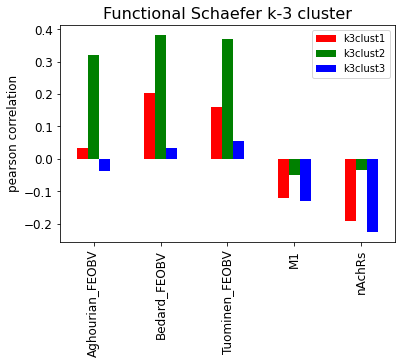

In [150]:
ax = FS_k3clustcorr_df.plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Functional Schaefer k-3 cluster', fontsize=16)
#     ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.figure.savefig(fig_path+'Func_Schaefer_k-3cluster_comp.png', dpi=300)

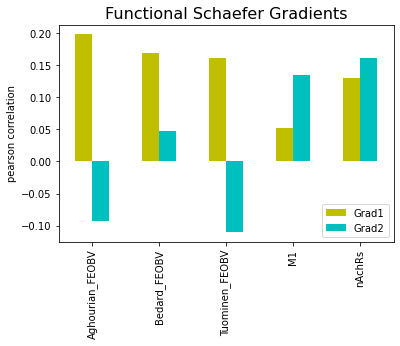

In [151]:
ax = FS_gradcorr_df.plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional Schaefer Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Func_Schaefer_Gradients_comp.png', dpi=300)

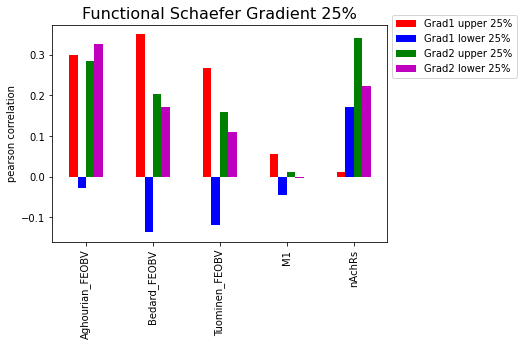

In [152]:
ax = FS_grad25corr_df.plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional Schaefer Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Func_Schaefer_Gradients_25%_comp.png', dpi=300)

### Spatial Null models

In [153]:
alex_aghourian_rotated = nulls.alexander_bloch(Aghourian_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_bedard_rotated = nulls.alexander_bloch(Bedard_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_touminen_rotated = nulls.alexander_bloch(Tuominen_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_M1_rotated = nulls.alexander_bloch(M1_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_nAchRs_rotated = nulls.alexander_bloch(nAchRs_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)

In [154]:
alex_tr_aghourian_rotated = nulls.alexander_bloch(Tr_Aghourian_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_tr_bedard_rotated = nulls.alexander_bloch(Tr_Bedard_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_tr_touminen_rotated = nulls.alexander_bloch(Tr_Tuominen_FEOBV_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_tr_M1_rotated = nulls.alexander_bloch(Tr_M1_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)
alex_tr_nAchRs_rotated = nulls.alexander_bloch(Tr_nAchRs_fslr, atlas='fslr', density='32k', n_perm=100, seed=1234)

In [155]:
# Compare with Aghourian_FEOBV
Aghourian_k3clust1corr, Aghourian_k3clust1pval = stats.compare_images(Aghourian_FEOBV_fslr, k3clust1, nulls=alex_aghourian_rotated)
Aghourian_k3clust2corr, Aghourian_k3clust2pval = stats.compare_images(Aghourian_FEOBV_fslr, k3clust2, nulls=alex_aghourian_rotated)
Aghourian_k3clust3corr, Aghourian_k3clust3pval = stats.compare_images(Aghourian_FEOBV_fslr, k3clust3, nulls=alex_aghourian_rotated)

Aghourian_G1corr, Aghourian_G1pval = stats.compare_images(Aghourian_FEOBV_fslr, grad1, nulls=alex_aghourian_rotated)
Aghourian_G2corr, Aghourian_G2pval = stats.compare_images(Aghourian_FEOBV_fslr, grad2, nulls=alex_aghourian_rotated)

Aghourian_G1upper25corr, Aghourian_G1upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fslr, grad1_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G1lower25corr, Aghourian_G1lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fslr, grad1_lower25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2upper25corr, Aghourian_G2upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fslr, grad2_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2lower25corr, Aghourian_G2lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fslr, grad2_lower25, nulls=alex_tr_aghourian_rotated)

In [156]:
# Compare with Bedard_FEOBV
Bedard_k3clust1corr, Bedard_k3clust1pval = stats.compare_images(Bedard_FEOBV_fslr, k3clust1, nulls=alex_bedard_rotated)
Bedard_k3clust2corr, Bedard_k3clust2pval = stats.compare_images(Bedard_FEOBV_fslr, k3clust2, nulls=alex_bedard_rotated)
Bedard_k3clust3corr, Bedard_k3clust3pval = stats.compare_images(Bedard_FEOBV_fslr, k3clust3, nulls=alex_bedard_rotated)

Bedard_G1corr, Bedard_G1pval = stats.compare_images(Bedard_FEOBV_fslr, grad1, nulls=alex_bedard_rotated)
Bedard_G2corr, Bedard_G2pval = stats.compare_images(Bedard_FEOBV_fslr, grad2, nulls=alex_bedard_rotated)

Bedard_G1upper25corr, Bedard_G1upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fslr, grad1_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G1lower25corr, Bedard_G1lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fslr, grad1_lower25, nulls=alex_tr_bedard_rotated)
Bedard_G2upper25corr, Bedard_G2upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fslr, grad2_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G2lower25corr, Bedard_G2lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fslr, grad2_lower25, nulls=alex_tr_bedard_rotated)

In [157]:
# Compare with Tuominen_FEOBV
Tuominen_k3clust1corr, Tuominen_k3clust1pval = stats.compare_images(Tuominen_FEOBV_fslr, k3clust1, nulls=alex_touminen_rotated)
Tuominen_k3clust2corr, Tuominen_k3clust2pval = stats.compare_images(Tuominen_FEOBV_fslr, k3clust2, nulls=alex_touminen_rotated)
Tuominen_k3clust3corr, Tuominen_k3clust3pval = stats.compare_images(Tuominen_FEOBV_fslr, k3clust3, nulls=alex_touminen_rotated)

Tuominen_G1corr, Tuominen_G1pval = stats.compare_images(Tuominen_FEOBV_fslr, grad1, nulls=alex_touminen_rotated)
Tuominen_G2corr, Tuominen_G2pval = stats.compare_images(Tuominen_FEOBV_fslr, grad2, nulls=alex_touminen_rotated)

Tuominen_G1upper25corr, Tuominen_G1upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fslr, grad1_upper25, nulls=alex_tr_touminen_rotated)
Tuominen_G1lower25corr, Tuominen_G1lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fslr, grad1_lower25, nulls=alex_tr_touminen_rotated)
Tuominen_G2upper25corr, Tuominen_G2upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fslr, grad2_upper25, nulls=alex_tr_touminen_rotated)
Tuominen_G2lower25corr, Tuominen_G2lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fslr, grad2_lower25, nulls=alex_tr_touminen_rotated)

In [158]:
# Compare with M1
M1_k3clust1corr, M1_k3clust1pval = stats.compare_images(M1_fslr, k3clust1, nulls=alex_M1_rotated)
M1_k3clust2corr, M1_k3clust2pval = stats.compare_images(M1_fslr, k3clust2, nulls=alex_M1_rotated)
M1_k3clust3corr, M1_k3clust3pval = stats.compare_images(M1_fslr, k3clust3, nulls=alex_M1_rotated)

M1_G1corr, M1_G1pval = stats.compare_images(M1_fslr, grad1, nulls=alex_M1_rotated)
M1_G2corr, M1_G2pval = stats.compare_images(M1_fslr, grad2, nulls=alex_M1_rotated)

M1_G1upper25corr, M1_G1upper25pval = stats.compare_images(Tr_M1_fslr, grad1_upper25, nulls=alex_tr_M1_rotated)
M1_G1lower25corr, M1_G1lower25pval = stats.compare_images(Tr_M1_fslr, grad1_lower25, nulls=alex_tr_M1_rotated)
M1_G2upper25corr, M1_G2upper25pval = stats.compare_images(Tr_M1_fslr, grad2_upper25, nulls=alex_tr_M1_rotated)
M1_G2lower25corr, M1_G2lower25pval = stats.compare_images(Tr_M1_fslr, grad2_lower25, nulls=alex_tr_M1_rotated)

In [159]:
# Compare with nAchRs
nAchRs_k3clust1corr, nAchRs_k3clust1pval = stats.compare_images(nAchRs_fslr, k3clust1, nulls=alex_nAchRs_rotated)
nAchRs_k3clust2corr, nAchRs_k3clust2pval = stats.compare_images(nAchRs_fslr, k3clust2, nulls=alex_nAchRs_rotated)
nAchRs_k3clust3corr, nAchRs_k3clust3pval = stats.compare_images(nAchRs_fslr, k3clust3, nulls=alex_nAchRs_rotated)

nAchRs_G1corr, nAchRs_G1pval = stats.compare_images(nAchRs_fslr, grad1, nulls=alex_nAchRs_rotated)
nAchRs_G2corr, nAchRs_G2pval = stats.compare_images(nAchRs_fslr, grad2, nulls=alex_nAchRs_rotated)

nAchRs_G1upper25corr, nAchRs_G1upper25pval = stats.compare_images(Tr_nAchRs_fslr, grad1_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G1lower25corr, nAchRs_G1lower25pval = stats.compare_images(Tr_nAchRs_fslr, grad1_lower25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2upper25corr, nAchRs_G2upper25pval = stats.compare_images(Tr_nAchRs_fslr, grad2_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2lower25corr, nAchRs_G2lower25pval = stats.compare_images(Tr_nAchRs_fslr, grad2_lower25, nulls=alex_tr_nAchRs_rotated)

In [62]:
print(nAchRs_G2lower25corr, nAchRs_G1upper25pval)

0.22324420511722565 0.9504950495049505


In [160]:
FS_null_k3clust1corr = [Aghourian_k3clust1corr, Bedard_k3clust1corr, Tuominen_k3clust1corr, M1_k3clust1corr, nAchRs_k3clust1corr]
FS_null_k3clust2corr = [Aghourian_k3clust2corr, Bedard_k3clust2corr, Tuominen_k3clust2corr, M1_k3clust2corr, nAchRs_k3clust2corr]
FS_null_k3clust3corr = [Aghourian_k3clust3corr, Bedard_k3clust3corr, Tuominen_k3clust3corr, M1_k3clust3corr, nAchRs_k3clust3corr]

FS_null_grad1_corr = [Aghourian_G1corr, Bedard_G1corr, Tuominen_G1corr, M1_G1corr, nAchRs_G1corr]
FS_null_grad2_corr = [Aghourian_G2corr, Bedard_G2corr, Tuominen_G2corr, M1_G2corr, nAchRs_G2corr]

FS_null_grad1_upper25_corr = [Aghourian_G1upper25corr, Bedard_G1upper25corr, Tuominen_G1upper25corr, M1_G1upper25corr, nAchRs_G1upper25corr]
FS_null_grad1_lower25_corr = [Aghourian_G1lower25corr, Bedard_G1lower25corr, Tuominen_G1lower25corr, M1_G1lower25corr, nAchRs_G1lower25corr]
FS_null_grad2_upper25_corr = [Aghourian_G2upper25corr, Bedard_G2upper25corr, Tuominen_G2upper25corr, M1_G2upper25corr, nAchRs_G2upper25corr]
FS_null_grad2_lower25_corr = [Aghourian_G2lower25corr, Bedard_G2lower25corr, Tuominen_G2lower25corr, M1_G2lower25corr, nAchRs_G2lower25corr]

In [161]:
FS_null_k3clust1pval = [Aghourian_k3clust1pval, Bedard_k3clust1pval, Tuominen_k3clust1pval, M1_k3clust1pval, nAchRs_k3clust1pval]
FS_null_k3clust2pval = [Aghourian_k3clust2pval, Bedard_k3clust2pval, Tuominen_k3clust2pval, M1_k3clust2pval, nAchRs_k3clust2pval]
FS_null_k3clust3pval = [Aghourian_k3clust3pval, Bedard_k3clust3pval, Tuominen_k3clust3pval, M1_k3clust3pval, nAchRs_k3clust3pval]

FS_null_grad1_pval = [Aghourian_G1pval, Bedard_G1pval, Tuominen_G1pval, M1_G1pval, nAchRs_G1pval]
FS_null_grad2_pval = [Aghourian_G2pval, Bedard_G2pval, Tuominen_G2pval, M1_G2pval, nAchRs_G2pval]

FS_null_grad1_upper25_pval = [Aghourian_G1upper25pval, Bedard_G1upper25pval, Tuominen_G1upper25pval, M1_G1upper25pval, nAchRs_G1upper25pval]
FS_null_grad1_lower25_pval = [Aghourian_G1lower25pval, Bedard_G1lower25pval, Tuominen_G1lower25pval, M1_G1lower25pval, nAchRs_G1lower25pval]
FS_null_grad2_upper25_pval = [Aghourian_G2upper25pval, Bedard_G2upper25pval, Tuominen_G2upper25pval, M1_G2upper25pval, nAchRs_G2upper25pval]
FS_null_grad2_lower25_pval = [Aghourian_G2lower25pval, Bedard_G2lower25pval, Tuominen_G2lower25pval, M1_G2lower25pval, nAchRs_G2lower25pval]

In [162]:
FS_null_k3clustcorr_df = pd.DataFrame({'k3clust1corr':FS_null_k3clust1corr, 'k3clust1pval':FS_null_k3clust1pval, 'k3clust2corr':FS_null_k3clust2corr, 'k3clust2pval':FS_null_k3clust2pval,'k3clust3corr':FS_null_k3clust3corr, 'k3clust3pval':FS_null_k3clust3pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FS_null_gradcorr_df = pd.DataFrame({'Grad1corr':FS_null_grad1_corr, 'Grad1pval':FS_null_grad1_pval, 'Grad2corr':FS_null_grad2_corr, 'Grad2pval':FS_null_grad2_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FS_null_grad25corr_df = pd.DataFrame({'Grad1 upper 25% corr':FS_null_grad1_upper25_corr, 'Grad1 upper 25% pval':FS_null_grad1_upper25_pval, 'Grad1 lower 25% corr':FS_null_grad1_lower25_corr, 'Grad1 lower 25% pval':FS_null_grad1_lower25_pval, 'Grad2 upper 25% corr':FS_null_grad2_upper25_corr, 'Grad2 upper 25% pval':FS_null_grad2_upper25_pval, 'Grad2 lower 25% corr':FS_null_grad2_lower25_corr, 'Grad2 lower 25% pval':FS_null_grad2_lower25_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [163]:
FS_null_k3clustcorr_df

,k3clust1corr,k3clust1pval,k3clust2corr,k3clust2pval,k3clust3corr,k3clust3pval
Aghourian_FEOBV,0.031729,0.881188,0.320856,0.039604,-0.038358,0.831683
Bedard_FEOBV,0.202449,0.257426,0.383332,0.009901,0.033890,0.811881
Tuominen_FEOBV,0.159793,0.425743,0.370126,0.009901,0.056407,0.732673
M1,-0.121115,0.544554,-0.050554,0.742574,-0.129600,0.346535
nAchRs,-0.193537,0.089109,-0.036102,0.683168,-0.226991,0.069307


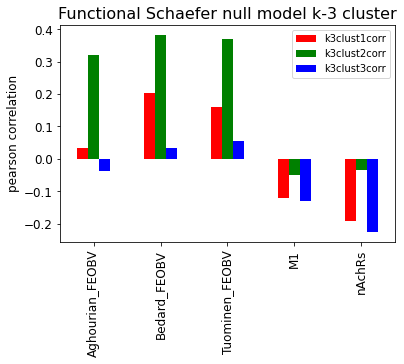

In [164]:
ax = FS_null_k3clustcorr_df[['k3clust1corr','k3clust2corr', 'k3clust3corr']].plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Functional Schaefer null model k-3 cluster', fontsize=16)
#     ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.figure.savefig(fig_path+'Func_Schaefer_null_k-3cluster_comp.png', dpi=300)

In [165]:
FS_null_gradcorr_df

,Grad1corr,Grad1pval,Grad2corr,Grad2pval
Aghourian_FEOBV,0.197948,0.069307,-0.093380,0.376238
Bedard_FEOBV,0.169375,0.118812,0.048044,0.693069
Tuominen_FEOBV,0.161977,0.198020,-0.110231,0.326733
M1,0.052424,0.623762,0.135159,0.237624
nAchRs,0.130237,0.257426,0.160909,0.128713


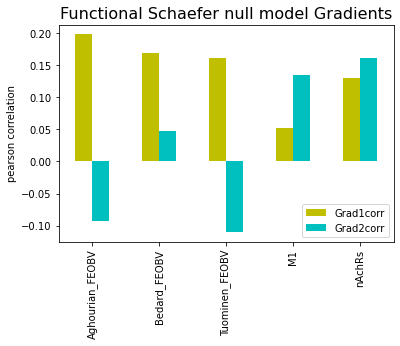

In [166]:
ax = FS_null_gradcorr_df[['Grad1corr','Grad2corr']].plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional Schaefer null model Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Func_Schaefer_null_Gradients_comp.png', dpi=300)

In [167]:
FS_null_grad25corr_df

,Grad1 upper 25% corr,Grad1 upper 25% pval,Grad1 lower 25% corr,Grad1 lower 25% pval,Grad2 upper 25% corr,Grad2 upper 25% pval,Grad2 lower 25% corr,Grad2 lower 25% pval
Aghourian_FEOBV,0.299074,0.039604,-0.027955,0.792079,0.285337,0.118812,0.325982,0.009901
Bedard_FEOBV,0.349451,0.009901,-0.136679,0.396040,0.203977,0.306931,0.170682,0.267327
Tuominen_FEOBV,0.268269,0.178218,-0.119095,0.544554,0.159082,0.534653,0.109669,0.534653
M1,0.055023,0.643564,-0.044769,0.623762,0.012199,0.881188,-0.003405,0.980198
nAchRs,0.011757,0.950495,0.171208,0.168317,0.341763,0.029703,0.223244,0.118812


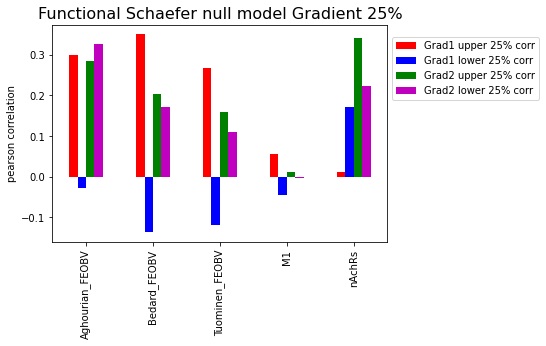

In [168]:
ax = FS_null_grad25corr_df[['Grad1 upper 25% corr','Grad1 lower 25% corr','Grad2 upper 25% corr','Grad2 lower 25% corr']].plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional Schaefer null model Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Func_Schaefer_null_Gradients_25%_comp.png', dpi=300)

In [169]:
pd.DataFrame(FS_null_k3clustcorr_df).to_csv(results_path + 'Func_Schaefer_null_k3clust_comp.csv')
pd.DataFrame(FS_null_gradcorr_df).to_csv(results_path + 'Func_Schaefer_null_Grad_comp.csv')
pd.DataFrame(FS_null_grad25corr_df).to_csv(results_path + 'Func_Schaefer_null_Grad25_comp.csv')

### Func HCPMMP data comparison

In [6]:
# Data path for func HCPMMP
FH_results_path = main_path + "HumanBF-Parcellation/results/Func_HCPMMP/"

In [7]:
# Cluster Data
k3clust1_L = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-1_L_fsa-10k.gii')
k3clust1_R = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-1_R_fsa-10k.gii')
k3clust1 = (k3clust1_L, k3clust1_R)
k3clust2_L = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-2_L_fsa-10k.gii')
k3clust2_R = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-2_R_fsa-10k.gii')
k3clust2 = (k3clust2_L, k3clust2_R)
k3clust3_L = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-3_L_fsa-10k.gii')
k3clust3_R = images.load_gifti(FH_results_path+'Func_HCPMMP_k-3_cluster-3_R_fsa-10k.gii')
k3clust3 = (k3clust3_L, k3clust3_R)

# Gradient data
grad1_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_weighted_L_fsa-10k.gii')
grad1_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_weighted_R_fsa-10k.gii')
grad1 = (grad1_L, grad1_R)

grad2_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_weighted_L_fsa-10k.gii')
grad2_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_weighted_R_fsa-10k.gii')
grad2 = (grad2_L, grad2_R)

grad1_upper25_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_Upper25%_L_fsa-10k.gii')
grad1_upper25_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_Upper25%_R_fsa-10k.gii')
grad1_lower25_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_Lower25%_L_fsa-10k.gii')
grad1_lower25_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-1_Lower25%_R_fsa-10k.gii')
grad1_upper25 = (grad1_upper25_L, grad1_upper25_R)
grad1_lower25 = (grad1_lower25_L, grad1_lower25_R)

grad2_upper25_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_Upper25%_L_fsa-10k.gii')
grad2_upper25_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_Upper25%_R_fsa-10k.gii')
grad2_lower25_L = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_Lower25%_L_fsa-10k.gii')
grad2_lower25_R = images.load_gifti(FH_results_path+'Func_HCPMMP_Gradient-2_Lower25%_R_fsa-10k.gii')
grad2_upper25 = (grad2_upper25_L, grad2_upper25_R)
grad2_lower25 = (grad2_lower25_L, grad2_lower25_R)

In [11]:
# Compare with Aghourian_FEOBV
Aghourian_FEOBVk3clust1corr = stats.compare_images(k3clust1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk3clust2corr = stats.compare_images(k3clust2, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk3clust3corr = stats.compare_images(k3clust3, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1corr = stats.compare_images(grad1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2corr = stats.compare_images(grad2, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')

In [12]:
# Compare with Bedard_FEOBV
Bedard_FEOBVk3clust1corr = stats.compare_images(k3clust1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk3clust2corr = stats.compare_images(k3clust2, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk3clust3corr = stats.compare_images(k3clust3, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1corr = stats.compare_images(grad1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2corr = stats.compare_images(grad2, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')

In [13]:
# Compare with Tuominen_FEOBV
Tuominen_FEOBVk3clust1corr = stats.compare_images(k3clust1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk3clust2corr = stats.compare_images(k3clust2, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk3clust3corr = stats.compare_images(k3clust3, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1corr = stats.compare_images(grad1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2corr = stats.compare_images(grad2, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')

In [14]:
# Compare with M1
M1k3clust1corr = stats.compare_images(k3clust1, M1_fsa, metric='pearsonr')
M1k3clust2corr = stats.compare_images(k3clust2, M1_fsa, metric='pearsonr')
M1k3clust3corr = stats.compare_images(k3clust3, M1_fsa, metric='pearsonr')

M1G1corr = stats.compare_images(grad1, M1_fsa, metric='pearsonr')
M1G2corr = stats.compare_images(grad2, M1_fsa, metric='pearsonr')

M1G1upper25corr = stats.compare_images(grad1_upper25, Tr_M1_fsa, metric='pearsonr')
M1G1lower25corr = stats.compare_images(grad1_lower25, Tr_M1_fsa, metric='pearsonr')
M1G2upper25corr = stats.compare_images(grad2_upper25, Tr_M1_fsa, metric='pearsonr')
M1G2lower25corr = stats.compare_images(grad2_lower25, Tr_M1_fsa, metric='pearsonr')

In [15]:
# Compare with nAchRs
nAchRsk3clust1corr = stats.compare_images(k3clust1, nAchRs_fsa, metric='pearsonr')
nAchRsk3clust2corr = stats.compare_images(k3clust2, nAchRs_fsa, metric='pearsonr')
nAchRsk3clust3corr = stats.compare_images(k3clust3, nAchRs_fsa, metric='pearsonr')

nAchRsG1corr = stats.compare_images(grad1, nAchRs_fsa, metric='pearsonr')
nAchRsG2corr = stats.compare_images(grad2, nAchRs_fsa, metric='pearsonr')

nAchRsG1upper25corr = stats.compare_images(grad1_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG1lower25corr = stats.compare_images(grad1_lower25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2upper25corr = stats.compare_images(grad2_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2lower25corr = stats.compare_images(grad2_lower25, Tr_nAchRs_fsa, metric='pearsonr')

In [16]:
FH_k3clust1corr = [Aghourian_FEOBVk3clust1corr, Bedard_FEOBVk3clust1corr, Tuominen_FEOBVk3clust1corr, M1k3clust1corr, nAchRsk3clust1corr]
FH_k3clust2corr = [Aghourian_FEOBVk3clust2corr, Bedard_FEOBVk3clust2corr, Tuominen_FEOBVk3clust2corr, M1k3clust2corr, nAchRsk3clust2corr]
FH_k3clust3corr = [Aghourian_FEOBVk3clust3corr, Bedard_FEOBVk3clust3corr, Tuominen_FEOBVk3clust3corr, M1k3clust3corr, nAchRsk3clust3corr]

FH_grad1_corr = [Aghourian_FEOBVG1corr, Bedard_FEOBVG1corr, Tuominen_FEOBVG1corr, M1G1corr, nAchRsG1corr]
FH_grad2_corr = [Aghourian_FEOBVG2corr, Bedard_FEOBVG2corr, Tuominen_FEOBVG2corr, M1G2corr, nAchRsG2corr]

FH_grad1_upper25_corr = [Aghourian_FEOBVG1upper25corr, Bedard_FEOBVG1upper25corr, Tuominen_FEOBVG1upper25corr, M1G1upper25corr, nAchRsG1upper25corr]
FH_grad1_lower25_corr = [Aghourian_FEOBVG1lower25corr, Bedard_FEOBVG1lower25corr, Tuominen_FEOBVG1lower25corr, M1G1lower25corr, nAchRsG1lower25corr]
FH_grad2_upper25_corr = [Aghourian_FEOBVG2upper25corr, Bedard_FEOBVG2upper25corr, Tuominen_FEOBVG2upper25corr, M1G2upper25corr, nAchRsG2upper25corr]
FH_grad2_lower25_corr = [Aghourian_FEOBVG2lower25corr, Bedard_FEOBVG2lower25corr, Tuominen_FEOBVG2lower25corr, M1G2lower25corr, nAchRsG2lower25corr]

In [17]:
FH_k3clustcorr_df = pd.DataFrame({'k3clust1':FH_k3clust1corr,'k3clust2':FH_k3clust2corr, 'k3clust3':FH_k3clust3corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FH_gradcorr_df = pd.DataFrame({'Grad1':FH_grad1_corr,'Grad2':FH_grad2_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FH_grad25corr_df = pd.DataFrame({'Grad1 upper 25%':FH_grad1_upper25_corr, 'Grad1 lower 25%':FH_grad1_lower25_corr, 'Grad2 upper 25%':FH_grad2_upper25_corr, 'Grad2 lower 25%':FH_grad2_lower25_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [18]:
pd.DataFrame(FH_k3clustcorr_df).to_csv(results_path + 'Func_HCPMMP_k3clust_corr.csv')
pd.DataFrame(FH_gradcorr_df).to_csv(results_path + 'Func_HCPMMP_Grad_corr.csv')
pd.DataFrame(FH_grad25corr_df).to_csv(results_path + 'Func_HCPMMP_Grad25_corr.csv')

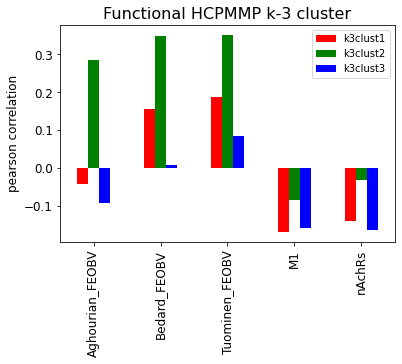

In [19]:
ax = FH_k3clustcorr_df.plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Functional HCPMMP k-3 cluster', fontsize=16)
#     ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.figure.savefig(fig_path+'Func_HCPMMP_k-3cluster_comp.png', dpi=300)

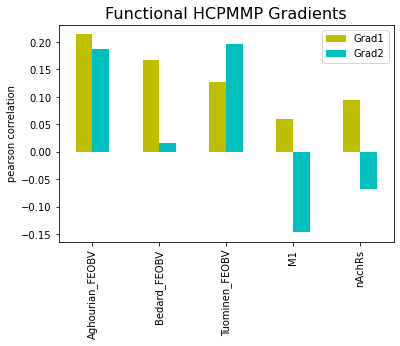

In [20]:
ax = FH_gradcorr_df.plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional HCPMMP Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Func_HCPMMP_Gradients_comp.png', dpi=300)

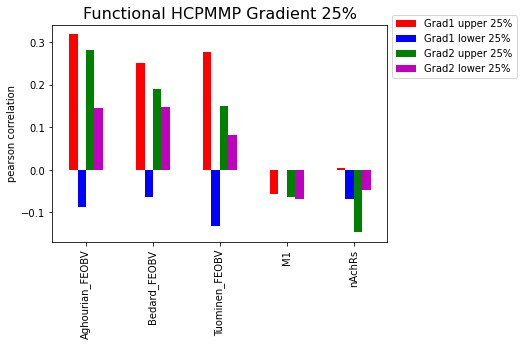

In [21]:
ax = FH_grad25corr_df.plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional HCPMMP Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Func_HCPMMP_Gradients_25%_comp.png', dpi=300)

### Spatial null Functional HCPMMP data

In [22]:
alex_aghourian_rotated = nulls.alexander_bloch(Aghourian_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_bedard_rotated = nulls.alexander_bloch(Bedard_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tuominen_rotated = nulls.alexander_bloch(Tuominen_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_M1_rotated = nulls.alexander_bloch(M1_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_nAchRs_rotated = nulls.alexander_bloch(nAchRs_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)

In [23]:
alex_tr_aghourian_rotated = nulls.alexander_bloch(Tr_Aghourian_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_bedard_rotated = nulls.alexander_bloch(Tr_Bedard_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_tuominen_rotated = nulls.alexander_bloch(Tr_Tuominen_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_M1_rotated = nulls.alexander_bloch(Tr_M1_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_nAchRs_rotated = nulls.alexander_bloch(Tr_nAchRs_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)

In [24]:
# Compare with Aghourian_FEOBV
Aghourian_k3clust1corr, Aghourian_k3clust1pval = stats.compare_images(Aghourian_FEOBV_fsa, k3clust1, nulls=alex_aghourian_rotated)
Aghourian_k3clust2corr, Aghourian_k3clust2pval = stats.compare_images(Aghourian_FEOBV_fsa, k3clust2, nulls=alex_aghourian_rotated)
Aghourian_k3clust3corr, Aghourian_k3clust3pval = stats.compare_images(Aghourian_FEOBV_fsa, k3clust3, nulls=alex_aghourian_rotated)

Aghourian_G1corr, Aghourian_G1pval = stats.compare_images(Aghourian_FEOBV_fsa, grad1, nulls=alex_aghourian_rotated)
Aghourian_G2corr, Aghourian_G2pval = stats.compare_images(Aghourian_FEOBV_fsa, grad2, nulls=alex_aghourian_rotated)

Aghourian_G1upper25corr, Aghourian_G1upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G1lower25corr, Aghourian_G1lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_lower25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2upper25corr, Aghourian_G2upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2lower25corr, Aghourian_G2lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_lower25, nulls=alex_tr_aghourian_rotated)

In [25]:
# Compare with Bedard_FEOBV
Bedard_k3clust1corr, Bedard_k3clust1pval = stats.compare_images(Bedard_FEOBV_fsa, k3clust1, nulls=alex_bedard_rotated)
Bedard_k3clust2corr, Bedard_k3clust2pval = stats.compare_images(Bedard_FEOBV_fsa, k3clust2, nulls=alex_bedard_rotated)
Bedard_k3clust3corr, Bedard_k3clust3pval = stats.compare_images(Bedard_FEOBV_fsa, k3clust3, nulls=alex_bedard_rotated)

Bedard_G1corr, Bedard_G1pval = stats.compare_images(Bedard_FEOBV_fsa, grad1, nulls=alex_bedard_rotated)
Bedard_G2corr, Bedard_G2pval = stats.compare_images(Bedard_FEOBV_fsa, grad2, nulls=alex_bedard_rotated)

Bedard_G1upper25corr, Bedard_G1upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G1lower25corr, Bedard_G1lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_lower25, nulls=alex_tr_bedard_rotated)
Bedard_G2upper25corr, Bedard_G2upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G2lower25corr, Bedard_G2lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_lower25, nulls=alex_tr_bedard_rotated)

In [26]:
# Compare with Tuominen_FEOBV
Tuominen_k3clust1corr, Tuominen_k3clust1pval = stats.compare_images(Tuominen_FEOBV_fsa, k3clust1, nulls=alex_tuominen_rotated)
Tuominen_k3clust2corr, Tuominen_k3clust2pval = stats.compare_images(Tuominen_FEOBV_fsa, k3clust2, nulls=alex_tuominen_rotated)
Tuominen_k3clust3corr, Tuominen_k3clust3pval = stats.compare_images(Tuominen_FEOBV_fsa, k3clust3, nulls=alex_tuominen_rotated)

Tuominen_G1corr, Tuominen_G1pval = stats.compare_images(Tuominen_FEOBV_fsa, grad1, nulls=alex_tuominen_rotated)
Tuominen_G2corr, Tuominen_G2pval = stats.compare_images(Tuominen_FEOBV_fsa, grad2, nulls=alex_tuominen_rotated)

Tuominen_G1upper25corr, Tuominen_G1upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G1lower25corr, Tuominen_G1lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_lower25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2upper25corr, Tuominen_G2upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2lower25corr, Tuominen_G2lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_lower25, nulls=alex_tr_tuominen_rotated)

In [27]:
# Compare with M1
M1_k3clust1corr, M1_k3clust1pval = stats.compare_images(M1_fsa, k3clust1, nulls=alex_M1_rotated)
M1_k3clust2corr, M1_k3clust2pval = stats.compare_images(M1_fsa, k3clust2, nulls=alex_M1_rotated)
M1_k3clust3corr, M1_k3clust3pval = stats.compare_images(M1_fsa, k3clust3, nulls=alex_M1_rotated)

M1_G1corr, M1_G1pval = stats.compare_images(M1_fsa, grad1, nulls=alex_M1_rotated)
M1_G2corr, M1_G2pval = stats.compare_images(M1_fsa, grad2, nulls=alex_M1_rotated)

M1_G1upper25corr, M1_G1upper25pval = stats.compare_images(Tr_M1_fsa, grad1_upper25, nulls=alex_tr_M1_rotated)
M1_G1lower25corr, M1_G1lower25pval = stats.compare_images(Tr_M1_fsa, grad1_lower25, nulls=alex_tr_M1_rotated)
M1_G2upper25corr, M1_G2upper25pval = stats.compare_images(Tr_M1_fsa, grad2_upper25, nulls=alex_tr_M1_rotated)
M1_G2lower25corr, M1_G2lower25pval = stats.compare_images(Tr_M1_fsa, grad2_lower25, nulls=alex_tr_M1_rotated)

In [28]:
# Compare with nAchRs
nAchRs_k3clust1corr, nAchRs_k3clust1pval = stats.compare_images(nAchRs_fsa, k3clust1, nulls=alex_nAchRs_rotated)
nAchRs_k3clust2corr, nAchRs_k3clust2pval = stats.compare_images(nAchRs_fsa, k3clust2, nulls=alex_nAchRs_rotated)
nAchRs_k3clust3corr, nAchRs_k3clust3pval = stats.compare_images(nAchRs_fsa, k3clust3, nulls=alex_nAchRs_rotated)

nAchRs_G1corr, nAchRs_G1pval = stats.compare_images(nAchRs_fsa, grad1, nulls=alex_nAchRs_rotated)
nAchRs_G2corr, nAchRs_G2pval = stats.compare_images(nAchRs_fsa, grad2, nulls=alex_nAchRs_rotated)

nAchRs_G1upper25corr, nAchRs_G1upper25pval = stats.compare_images(Tr_nAchRs_fsa, grad1_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G1lower25corr, nAchRs_G1lower25pval = stats.compare_images(Tr_nAchRs_fsa, grad1_lower25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2upper25corr, nAchRs_G2upper25pval = stats.compare_images(Tr_nAchRs_fsa, grad2_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2lower25corr, nAchRs_G2lower25pval = stats.compare_images(Tr_nAchRs_fsa, grad2_lower25, nulls=alex_tr_nAchRs_rotated)

In [29]:
FH_null_k3clust1corr = [Aghourian_k3clust1corr, Bedard_k3clust1corr, Tuominen_k3clust1corr, M1_k3clust1corr, nAchRs_k3clust1corr]
FH_null_k3clust2corr = [Aghourian_k3clust2corr, Bedard_k3clust2corr, Tuominen_k3clust2corr, M1_k3clust2corr, nAchRs_k3clust2corr]
FH_null_k3clust3corr = [Aghourian_k3clust3corr, Bedard_k3clust3corr, Tuominen_k3clust3corr, M1_k3clust3corr, nAchRs_k3clust3corr]

FH_null_grad1_corr = [Aghourian_G1corr, Bedard_G1corr, Tuominen_G1corr, M1_G1corr, nAchRs_G1corr]
FH_null_grad2_corr = [Aghourian_G2corr, Bedard_G2corr, Tuominen_G2corr, M1_G2corr, nAchRs_G2corr]

FH_null_grad1_upper25_corr = [Aghourian_G1upper25corr, Bedard_G1upper25corr, Tuominen_G1upper25corr, M1_G1upper25corr, nAchRs_G1upper25corr]
FH_null_grad1_lower25_corr = [Aghourian_G1lower25corr, Bedard_G1lower25corr, Tuominen_G1lower25corr, M1_G1lower25corr, nAchRs_G1lower25corr]
FH_null_grad2_upper25_corr = [Aghourian_G2upper25corr, Bedard_G2upper25corr, Tuominen_G2upper25corr, M1_G2upper25corr, nAchRs_G2upper25corr]
FH_null_grad2_lower25_corr = [Aghourian_G2lower25corr, Bedard_G2lower25corr, Tuominen_G2lower25corr, M1_G2lower25corr, nAchRs_G2lower25corr]

In [30]:
FH_null_k3clust1pval = [Aghourian_k3clust1pval, Bedard_k3clust1pval, Tuominen_k3clust1pval, M1_k3clust1pval, nAchRs_k3clust1pval]
FH_null_k3clust2pval = [Aghourian_k3clust2pval, Bedard_k3clust2pval, Tuominen_k3clust2pval, M1_k3clust2pval, nAchRs_k3clust2pval]
FH_null_k3clust3pval = [Aghourian_k3clust3pval, Bedard_k3clust3pval, Tuominen_k3clust3pval, M1_k3clust3pval, nAchRs_k3clust3pval]

FH_null_grad1_pval = [Aghourian_G1pval, Bedard_G1pval, Tuominen_G1pval, M1_G1pval, nAchRs_G1pval]
FH_null_grad2_pval = [Aghourian_G2pval, Bedard_G2pval, Tuominen_G2pval, M1_G2pval, nAchRs_G2pval]

FH_null_grad1_upper25_pval = [Aghourian_G1upper25pval, Bedard_G1upper25pval, Tuominen_G1upper25pval, M1_G1upper25pval, nAchRs_G1upper25pval]
FH_null_grad1_lower25_pval = [Aghourian_G1lower25pval, Bedard_G1lower25pval, Tuominen_G1lower25pval, M1_G1lower25pval, nAchRs_G1lower25pval]
FH_null_grad2_upper25_pval = [Aghourian_G2upper25pval, Bedard_G2upper25pval, Tuominen_G2upper25pval, M1_G2upper25pval, nAchRs_G2upper25pval]
FH_null_grad2_lower25_pval = [Aghourian_G2lower25pval, Bedard_G2lower25pval, Tuominen_G2lower25pval, M1_G2lower25pval, nAchRs_G2lower25pval]

In [31]:
FH_null_k3clustcorr_df = pd.DataFrame({'k3clust1corr':FH_null_k3clust1corr, 'k3clust1pval':FH_null_k3clust1pval, 'k3clust2corr':FH_null_k3clust2corr, 'k3clust2pval':FH_null_k3clust2pval,'k3clust3corr':FH_null_k3clust3corr, 'k3clust3pval':FH_null_k3clust3pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FH_null_gradcorr_df = pd.DataFrame({'Grad1corr':FH_null_grad1_corr, 'Grad1pval':FH_null_grad1_pval, 'Grad2corr':FH_null_grad2_corr, 'Grad2pval':FH_null_grad2_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
FH_null_grad25corr_df = pd.DataFrame({'Grad1 upper 25% corr':FH_null_grad1_upper25_corr, 'Grad1 upper 25% pval':FH_null_grad1_upper25_pval, 'Grad1 lower 25% corr':FH_null_grad1_lower25_corr, 'Grad1 lower 25% pval':FH_null_grad1_lower25_pval, 'Grad2 upper 25% corr':FH_null_grad2_upper25_corr, 'Grad2 upper 25% pval':FH_null_grad2_upper25_pval, 'Grad2 lower 25% corr':FH_null_grad2_lower25_corr, 'Grad2 lower 25% pval':FH_null_grad2_lower25_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [32]:
FH_null_k3clustcorr_df

,k3clust1corr,k3clust1pval,k3clust2corr,k3clust2pval,k3clust3corr,k3clust3pval
Aghourian_FEOBV,-0.043057,0.831683,0.283601,0.019802,-0.091944,0.534653
Bedard_FEOBV,0.156302,0.396040,0.348429,0.009901,0.006462,1.000000
Tuominen_FEOBV,0.186072,0.326733,0.351691,0.009901,0.084994,0.564356
M1,-0.169937,0.396040,-0.084705,0.465347,-0.157573,0.267327
nAchRs,-0.141403,0.168317,-0.032608,0.722772,-0.163434,0.089109


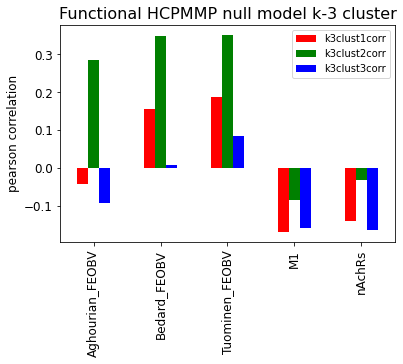

In [33]:
ax = FH_null_k3clustcorr_df[['k3clust1corr','k3clust2corr', 'k3clust3corr']].plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Functional HCPMMP null model k-3 cluster', fontsize=16)
#     ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.figure.savefig(fig_path+'Func_HCPMMP_null_k-3cluster_comp.png', dpi=300)

In [34]:
FH_null_gradcorr_df

,Grad1corr,Grad1pval,Grad2corr,Grad2pval
Aghourian_FEOBV,0.213541,0.039604,0.187700,0.108911
Bedard_FEOBV,0.167571,0.069307,0.015872,0.861386
Tuominen_FEOBV,0.126482,0.217822,0.196401,0.118812
M1,0.058970,0.544554,-0.146016,0.207921
nAchRs,0.093862,0.257426,-0.066839,0.504950


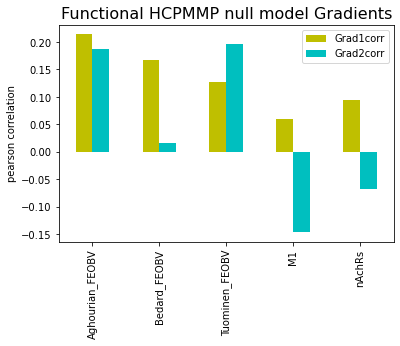

In [35]:
ax = FH_null_gradcorr_df[['Grad1corr','Grad2corr']].plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional HCPMMP null model Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Func_HCPMMP_null_Gradients_comp.png', dpi=300)

In [36]:
FH_null_grad25corr_df

,Grad1 upper 25% corr,Grad1 upper 25% pval,Grad1 lower 25% corr,Grad1 lower 25% pval,Grad2 upper 25% corr,Grad2 upper 25% pval,Grad2 lower 25% corr,Grad2 lower 25% pval
Aghourian_FEOBV,0.318494,0.009901,-0.086619,0.544554,0.282771,0.049505,0.146798,0.405941
Bedard_FEOBV,0.250327,0.039604,-0.064523,0.663366,0.190170,0.247525,0.147589,0.495050
Tuominen_FEOBV,0.276781,0.079208,-0.131707,0.495050,0.149572,0.257426,0.081600,0.574257
M1,-0.055929,0.623762,-0.000872,1.000000,-0.062533,0.603960,-0.067312,0.623762
nAchRs,0.004694,0.980198,-0.068940,0.603960,-0.146263,0.336634,-0.046997,0.792079


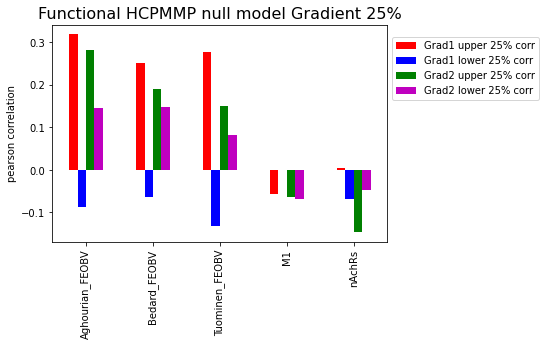

In [37]:
ax = FH_null_grad25corr_df[['Grad1 upper 25% corr','Grad1 lower 25% corr','Grad2 upper 25% corr','Grad2 lower 25% corr']].plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Functional HCPMMP null model Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Func_HCPMMP_null_Gradients_25%_comp.png', dpi=300)

In [38]:
pd.DataFrame(FH_null_k3clustcorr_df).to_csv(results_path + 'Func_HCPMMP_null_k3clust_comp.csv')
pd.DataFrame(FH_null_gradcorr_df).to_csv(results_path + 'Func_HCPMMP_null_Grad_comp.csv')
pd.DataFrame(FH_null_grad25corr_df).to_csv(results_path + 'Func_HCPMMP_null_Grad25_comp.csv')

In [39]:
FH_null_grad25corr_df.zen.pretty(font_size="12pt")

,Grad1 upper 25% corr,Grad1 upper 25% pval,Grad1 lower 25% corr,Grad1 lower 25% pval,Grad2 upper 25% corr,Grad2 upper 25% pval,Grad2 lower 25% corr,Grad2 lower 25% pval
Aghourian_FEOBV,0.318494,0.009901,-0.086619,0.544554,0.282771,0.049505,0.146798,0.405941
Bedard_FEOBV,0.250327,0.039604,-0.064523,0.663366,0.190170,0.247525,0.147589,0.495050
Tuominen_FEOBV,0.276781,0.079208,-0.131707,0.495050,0.149572,0.257426,0.081600,0.574257
M1,-0.055929,0.623762,-0.000872,1.000000,-0.062533,0.603960,-0.067312,0.623762
nAchRs,0.004694,0.980198,-0.068940,0.603960,-0.146263,0.336634,-0.046997,0.792079
